In [21]:
import dezero

x, t = dezero.datasets.get_spiral(train=True)

In [22]:
x.shape

(300, 2)

In [23]:
t.shape

(300,)

In [24]:
print(x[:10], t[:10])

[[-0.13981389 -0.00721657]
 [ 0.37049392  0.5820947 ]
 [ 0.1374263  -0.17179643]
 [ 0.3031688   0.06472   ]
 [-0.20848857  0.53050214]
 [-0.7074377  -0.13391   ]
 [ 0.49455667 -0.3739167 ]
 [ 0.23201972  0.13808277]
 [-0.15886047 -0.01906173]
 [ 0.00491708 -0.33996445]] [1 1 2 0 1 2 0 0 1 2]


In [25]:
type(x)

numpy.ndarray

In [26]:
import pandas as pd
# df = [[x[i], t[i]] for i in range(len(x))]
# df = pd.DataFrame(df, columns=['x', 't'])
x_df = pd.DataFrame(x, columns=['x', 'y'])

In [27]:
x_df

,x,y
0,-0.139814,-0.007217
1,0.370494,0.582095
2,0.137426,-0.171796
3,0.303169,0.064720
4,-0.208489,0.530502
...,...,...
295,-0.566743,-0.164018
296,-0.835929,0.407581
297,0.436149,-0.223325
298,-0.188530,-0.375308


In [28]:
type(x)

numpy.ndarray

In [29]:
df2 = pd.DataFrame(zip(*x.T, t.T), columns=['x', 'y', 't'])

In [30]:
df2

,x,y,t
0,-0.139814,-0.007217,1
1,0.370494,0.582095,1
2,0.137426,-0.171796,2
3,0.303169,0.064720,0
4,-0.208489,0.530502,1
...,...,...,...
295,-0.566743,-0.164018,2
296,-0.835929,0.407581,2
297,0.436149,-0.223325,0
298,-0.188530,-0.375308,2


Text(0, 0.5, 'y')

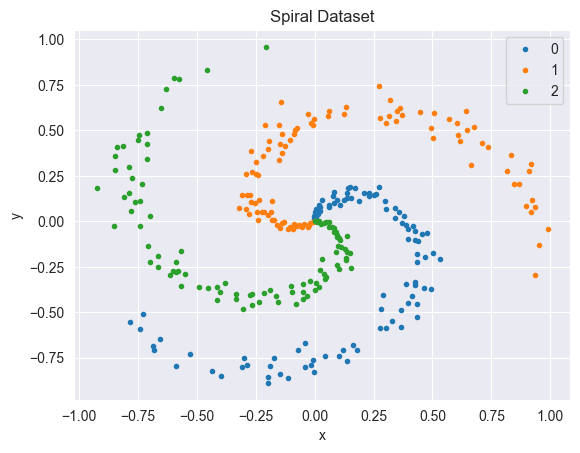

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
fig, ax = plt.subplots()
for name, group in df2.groupby('t'):
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=3, label=name)
ax.legend()
ax.set_title('Spiral Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [34]:
import math
import numpy as np
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)
data_size = len(x)
max_iter = math.ceil(data_size/batch_size)

for epoch in range(max_epoch):
    index = np.random.permutation(range(data_size))
    sum_loss = 0
    
    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]
        
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(batch_x)
        
        avg_loss = sum_loss / data_size
        print(f'epoch:{epoch + 1}, loss:{avg_loss:.2f}')


epoch:1, loss:0.11
epoch:1, loss:0.23
epoch:1, loss:0.34
epoch:1, loss:0.45
epoch:1, loss:0.56
epoch:1, loss:0.67
epoch:1, loss:0.77
epoch:1, loss:0.89
epoch:1, loss:1.00
epoch:1, loss:1.11
epoch:2, loss:0.11
epoch:2, loss:0.21
epoch:2, loss:0.31
epoch:2, loss:0.41
epoch:2, loss:0.53
epoch:2, loss:0.63
epoch:2, loss:0.74
epoch:2, loss:0.83
epoch:2, loss:0.93
epoch:2, loss:1.02
epoch:3, loss:0.10
epoch:3, loss:0.19
epoch:3, loss:0.29
epoch:3, loss:0.39
epoch:3, loss:0.49
epoch:3, loss:0.58
epoch:3, loss:0.67
epoch:3, loss:0.77
epoch:3, loss:0.85
epoch:3, loss:0.94
epoch:4, loss:0.09
epoch:4, loss:0.19
epoch:4, loss:0.27
epoch:4, loss:0.37
epoch:4, loss:0.47
epoch:4, loss:0.55
epoch:4, loss:0.64
epoch:4, loss:0.73
epoch:4, loss:0.81
epoch:4, loss:0.90
epoch:5, loss:0.09
epoch:5, loss:0.19
epoch:5, loss:0.28
epoch:5, loss:0.37
epoch:5, loss:0.44
epoch:5, loss:0.53
epoch:5, loss:0.61
epoch:5, loss:0.70
epoch:5, loss:0.77
epoch:5, loss:0.86
epoch:6, loss:0.08
epoch:6, loss:0.17
epoch:6, los

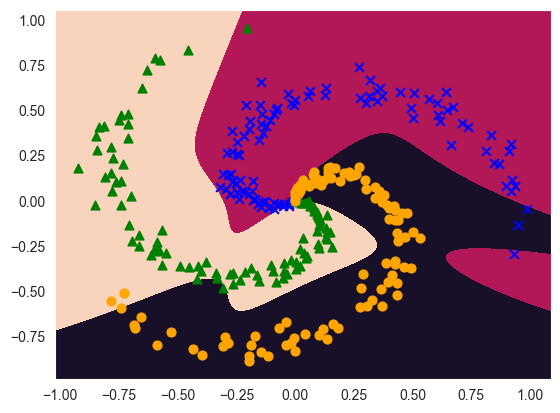

In [35]:
# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()